In [1]:
import pandas as pd 

In [2]:
base = pd.read_csv('census.csv')

In [3]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
def converteClasse(rotulo): 
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [6]:
base['income'] = base['income'].apply(converteClasse)

In [7]:
base['income'].unique()

array([0, 1])

In [8]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
x = base.drop('income', axis = 1)

In [10]:
x.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [11]:
y = base['income']

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [13]:
y.unique()

array([0, 1])

In [14]:
type(y)

pandas.core.series.Series

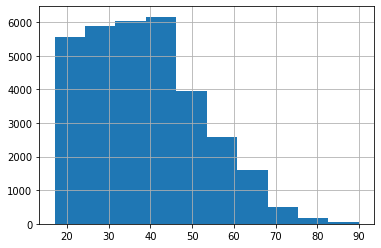

In [15]:
base.age.hist()

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
idade = tf.feature_column.numeric_column('age')

In [18]:
idadeCategorica = [tf.feature_column.bucketized_column(idade, boundaries=[20, 30, 40, 50, 60, 70,80,90])]

In [19]:
x.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [20]:
nomeColunasCategoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                          'race', 'sex','native-country']

In [21]:
colunasCategoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list = x[c].unique()) for c in nomeColunasCategoricas]

In [22]:
colunasCategoricas

[VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' 

In [23]:
nomeColunasNumericas = ['final-weight','education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [24]:
colunasNumericas = [tf.feature_column.numeric_column(key = c) for c in nomeColunasNumericas]

In [25]:
colunas = idadeCategorica + colunasCategoricas + colunasNumericas

In [26]:
from sklearn.model_selection import train_test_split

treinamentoX, testeX, treinamentoY, testeY = train_test_split(x, y, test_size=0.3)

In [27]:
funcaoTreinamento = tf.estimator.inputs.pandas_input_fn(x = treinamentoX, y = treinamentoY, 
                                                        batch_size=32, num_epochs=None, shuffle=True)

In [28]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpyg_vmxoc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
classificador.train(input_fn = funcaoTreinamento, steps = 10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyg_vmxoc/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 43.986
INFO:tensorflow:loss = 9983.377, step = 101 (2.277 s

INFO:tensorflow:loss = 3964.366, step = 5701 (0.933 sec)
INFO:tensorflow:global_step/sec: 122.728
INFO:tensorflow:loss = 1597.5376, step = 5801 (0.819 sec)
INFO:tensorflow:global_step/sec: 142.012
INFO:tensorflow:loss = 7291.1094, step = 5901 (0.710 sec)
INFO:tensorflow:global_step/sec: 101.377
INFO:tensorflow:loss = 930.714, step = 6001 (0.976 sec)
INFO:tensorflow:global_step/sec: 121.927
INFO:tensorflow:loss = 748.63257, step = 6101 (0.821 sec)
INFO:tensorflow:global_step/sec: 110.395
INFO:tensorflow:loss = 330.89175, step = 6201 (0.905 sec)
INFO:tensorflow:global_step/sec: 104.916
INFO:tensorflow:loss = 1480.2394, step = 6301 (0.953 sec)
INFO:tensorflow:global_step/sec: 113.502
INFO:tensorflow:loss = 538.73376, step = 6401 (0.881 sec)
INFO:tensorflow:global_step/sec: 114.476
INFO:tensorflow:loss = 1937.3958, step = 6501 (0.895 sec)
INFO:tensorflow:global_step/sec: 112.759
INFO:tensorflow:loss = 2078.7441, step = 6601 (0.870 sec)
INFO:tensorflow:global_step/sec: 130.694
INFO:tensorfl

In [30]:
funcaoPrevisao = tf.estimator.inputs.pandas_input_fn(x= testeX, y = testeY, batch_size = 32, shuffle = False)

In [31]:
previsoes = classificador.predict(input_fn = funcaoPrevisao)

In [32]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyg_vmxoc/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([52.382324], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([1.7809253e-23, 1.0000000e+00], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-75.979706], dtype=float32),
  'logistic': array([1.005618e-33], dtype=float32),
  'probabilities': array([1.00000000e+00, 1.00561815e-33], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-424.57028], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': arr

In [33]:
previsoesFinais = []
for p in classificador.predict(input_fn = funcaoPrevisao):
    previsoesFinais.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyg_vmxoc/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
taxaDeAcerto = accuracy_score(testeY, previsoesFinais)

In [36]:
taxaDeAcerto

0.7925069096120381